In [2]:
import osmnx as ox

g = ox.graph_from_bbox(43.403766,43.032844,77.166754,76.738277, network_type='all', simplify=True, retain_all=True)

C:\Users\karasu\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [38]:
u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in g.edges(keys=True, data=True):
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)   

In [44]:
# Lists to store colors and widths 
roadColors = []
roadWidths = []

for item in data:
    if "length" in item.keys():
        if item["length"] <= 100:
            linewidth = 0.10
            color = "#ECF2FF" 
            
        elif item["length"] > 100 and item["length"] <= 200:
            linewidth = 0.15
            color = "#3E54AC"
            
        elif item["length"] > 200 and item["length"] <= 400:
            linewidth = 0.25
            color = "#655DBB"
            
        elif item["length"] > 400 and item["length"] <= 800:
            color = "#BFACE2"
            linewidth = 0.35
        else:
            color = "#d5d5d5"
            linewidth = 0.45

        if "primary" in item["highway"]:
            linewidth = 0.5
            color = "#ffff"
    else:
        color = "#a6a6a6"
        linewidth = 0.10
            
    roadColors.append(color)
    roadWidths.append(linewidth)

In [39]:
length_total = 0
for i in data:
    length_total += i['length']
round(length_total, 3)

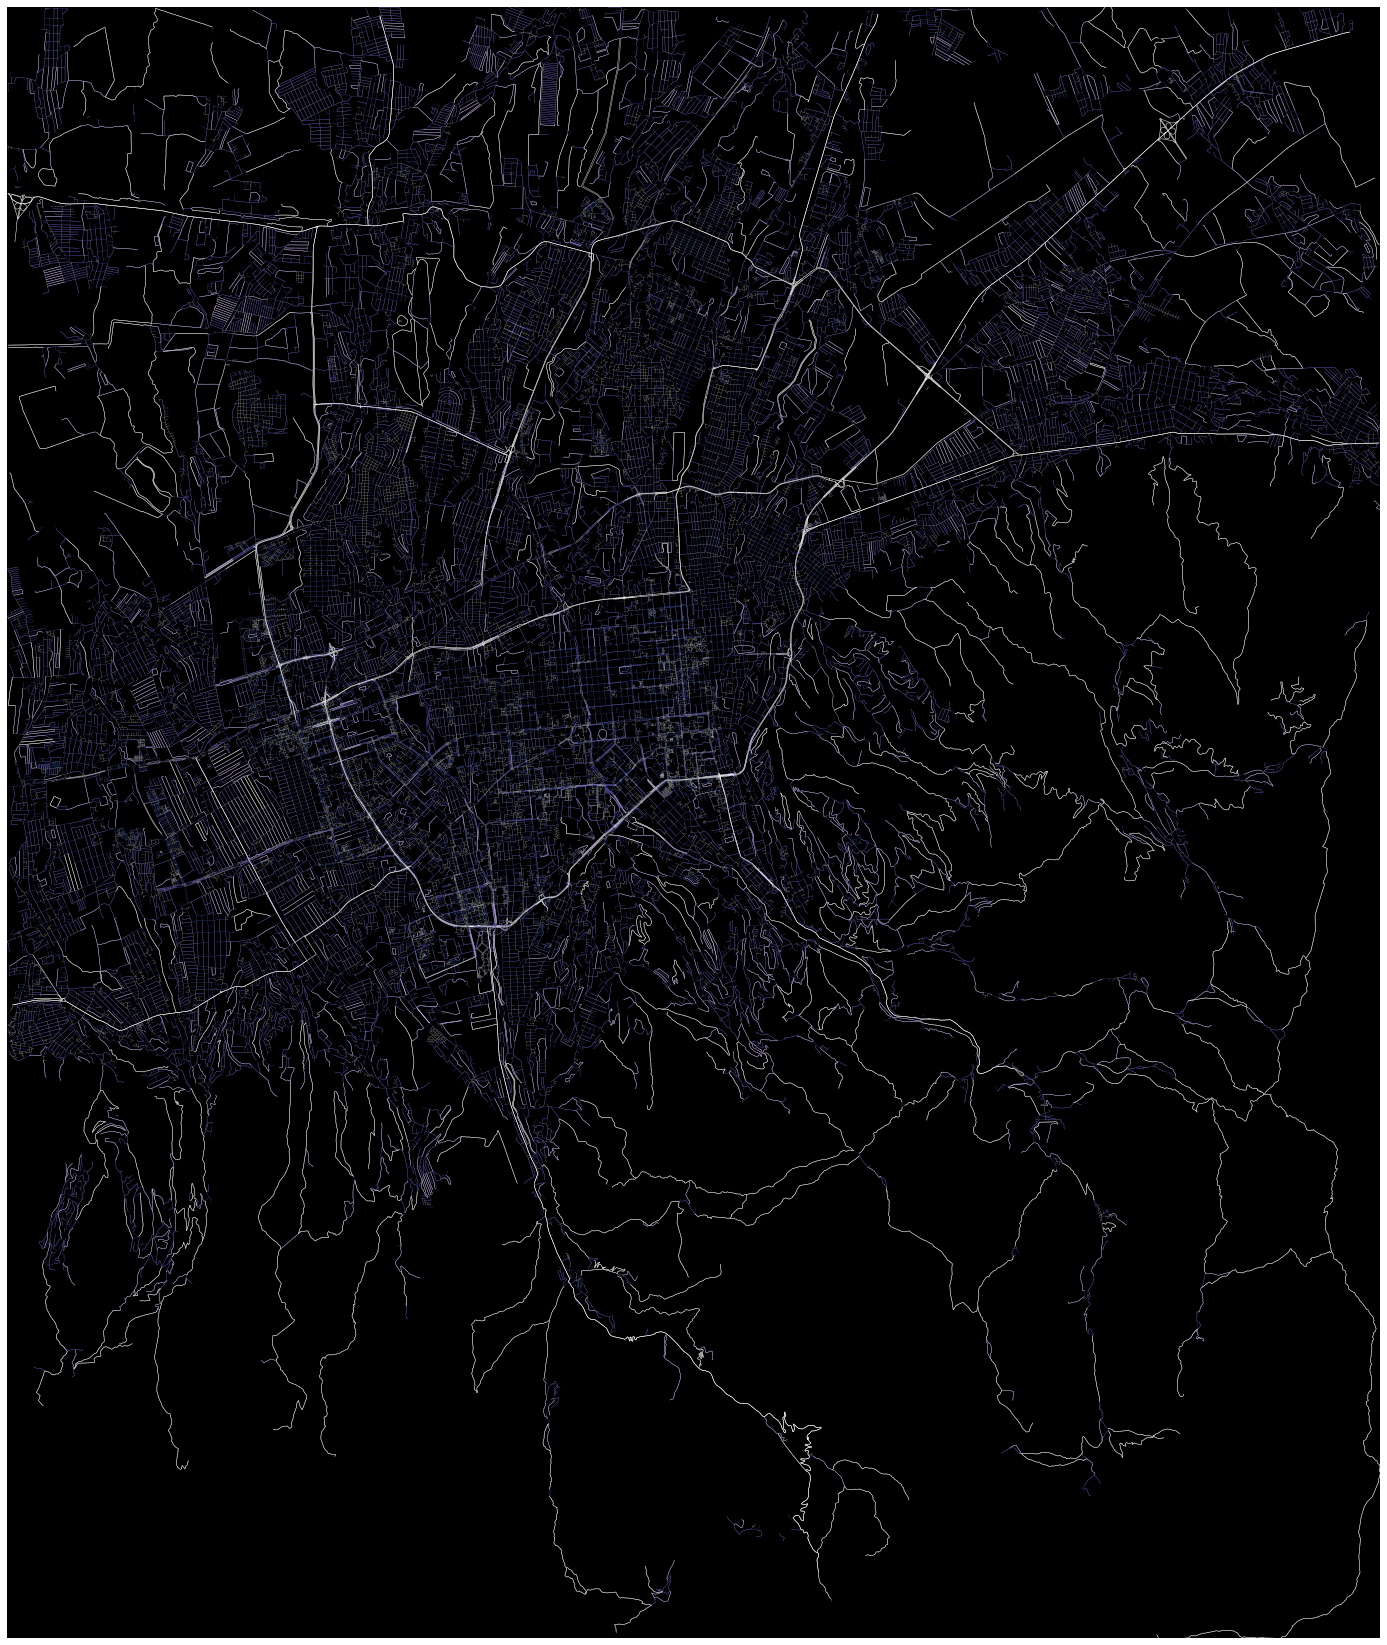

In [47]:
fig, ax = ox.plot_graph(g, figsize=(30,30), node_size=0, 
                        bgcolor = '#000',  dpi = 300,
                        save = True, edge_color=roadColors,
                        edge_linewidth=roadWidths, edge_alpha=1, filepath='almaty.png',
                       bbox=(43.403766,43.032844,77.166754,76.738277))

In [17]:
b = ox.geocode_to_gdf("Turkistan", which_result=1)
b

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((68.18309 43.30267, 68.18741 43.30036...",43.327769,43.251107,68.336811,68.183089,272843908,way,880812236,43.301946,68.27037,"Turkestan, Түркістан Қ.А., Turkistan Region, 1...",place,town,0.523991
